# Stock Market and Portfolio Anaylsis with pandas_datareader and quandl

This post includes code adapted from [python for finance and trading algorithms udemy course](https://udemy.com/python-for-finance-and-trading-algorithms/) and [python for finance and trading algorithms udemy course notebooks](https://github.com/theoneandonlywoj/Python-for-Financial-Analysis-and-Algorithmic-Trading).

In [56]:
import pandas as pd
from pandas_datareader import data, wb
import datetime

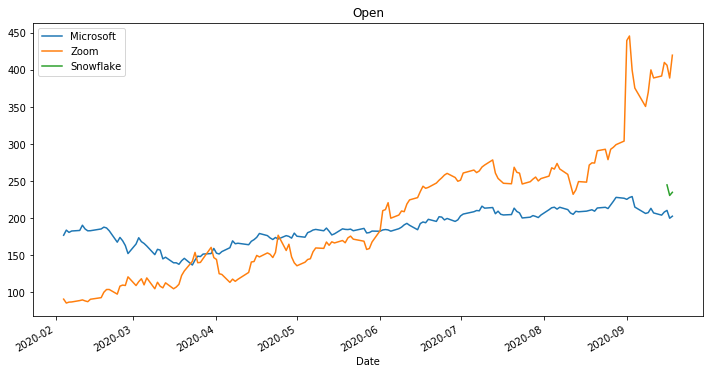

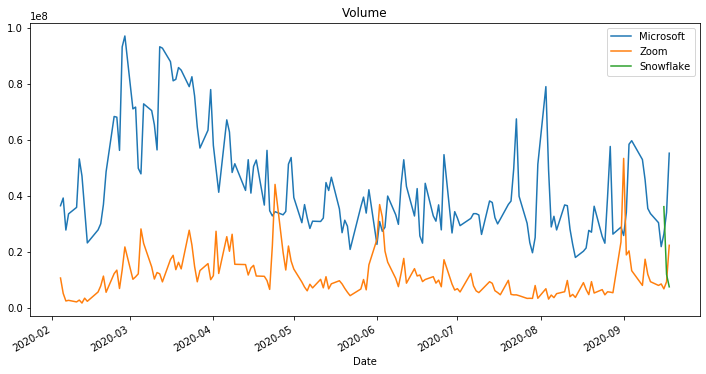

In [57]:
start = pd.to_datetime('2020-02-04')
end = pd.to_datetime('today')


MSFT_stock = web.DataReader('MSFT', 'yahoo', start, end)
MSFT_stock.head()

ZOOM_stock = web.DataReader('ZM', 'yahoo', start, end)
ZOOM_stock.head()

SNOW_stock = web.DataReader('SNOW', 'yahoo', start, end)
SNOW_stock.head()


fig = plt.figure(figsize=(12, 6))
plt.title('Open')

MSFT_stock['Open'].plot(label='Microsoft')
ZOOM_stock['Open'].plot(label='Zoom')
SNOW_stock['Open'].plot(label='Snowflake')
plt.legend()

fig = plt.figure(figsize=(12, 6))
plt.title('Volume')

MSFT_stock['Volume'].plot(label='Microsoft')
ZOOM_stock['Volume'].plot(label='Zoom')
SNOW_stock['Volume'].plot(label='Snowflake')
plt.legend()


In [58]:
import pandas as pd
import quandl

In [59]:
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('today')


,COST Pos,NLSN Pos,NKE Pos,DIS Pos,Total Pos
Date,,,,,
2018-03-21,758153.014553,144489.827125,1.799185e+06,1.054741e+06,3.756569e+06
2018-03-22,744177.280475,141728.307617,1.746850e+06,1.042104e+06,3.674859e+06
2018-03-23,736843.076002,140347.547864,1.752545e+06,1.020764e+06,3.650500e+06
2018-03-26,762838.756299,142663.660999,1.786983e+06,1.042622e+06,3.735107e+06
2018-03-27,746255.305075,142930.904822,1.794304e+06,1.029259e+06,3.712749e+06


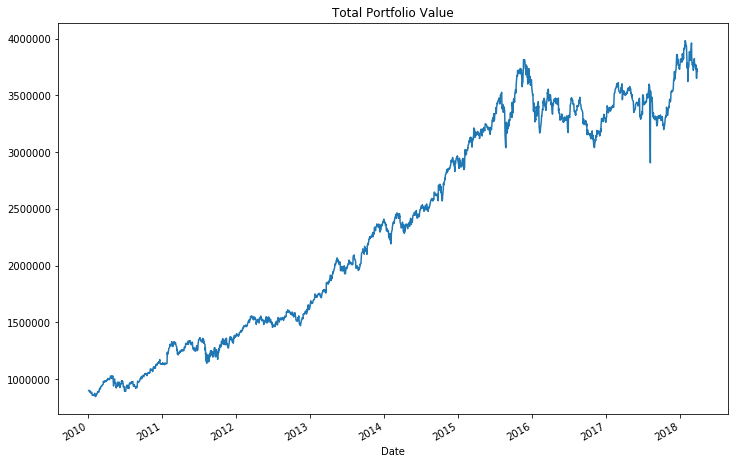

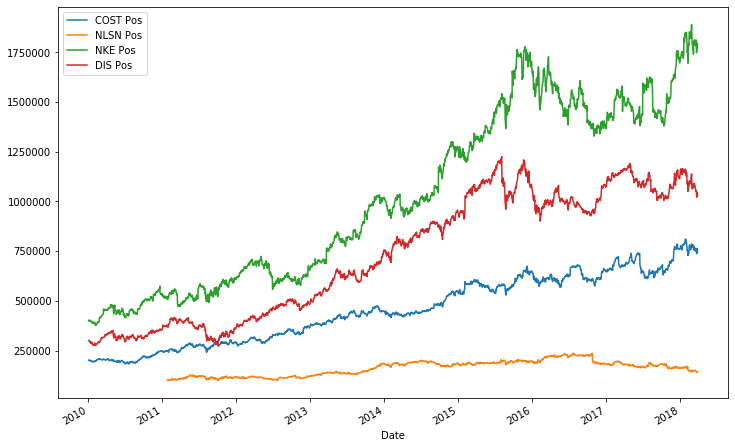

In [60]:
# Grabbing a bunch of tech stocks for our portfolio
COST = quandl.get('WIKI/COST.11',
                  start_date = start,
                  end_date = end)
NLSN = quandl.get('WIKI/NLSN.11',
                   start_date = start,
                   end_date = end)
NKE = quandl.get('WIKI/NKE.11',
                 start_date = start,
                 end_date = end)
DIS = quandl.get('WIKI/DIS.11',
                  start_date = start,
                  end_date = end)



# Example
COST.iloc[0]['Adj. Close']

for stock_df in (COST, NLSN, NKE, DIS):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

COST.head()

COST.tail()

## Allocations

for stock_df,allo in zip([COST,NLSN,NKE,DIS],[.2, .1, .4, .3]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo

COST.head()

## Investment

for stock_df in [COST,NLSN,NKE,DIS]:
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000

## Total Portfolio Value

portfolio_val = pd.concat([COST['Position Values'],
                           NLSN['Position Values'],
                           NKE['Position Values'],
                           DIS['Position Values']],
                          axis = 1)

portfolio_val.head()

portfolio_val.columns = ['COST Pos', 'NLSN Pos', 'NKE Pos', 'DIS Pos']

portfolio_val.head()

portfolio_val['Total Pos'] = portfolio_val.sum(axis = 1)

portfolio_val.head()

import matplotlib.pyplot as plt
%matplotlib inline

portfolio_val['Total Pos'].plot(figsize = (12, 8))
plt.title('Total Portfolio Value')

portfolio_val.drop('Total Pos',
                   axis = 1).plot(kind = 'line', figsize = (12, 8))

portfolio_val.tail()